In [ ]:
#Instruction
#To run this code, install Anaconda distribution for Mac 
#Link: https://www.anaconda.com/download/
#Then download all the code + the csv file /jen_color/color_emotion.csv 
#launch conda & run the code

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#read raw data from csv file
rawdata=pd.read_csv('./jen_color/color_emotion.csv')
#view raw data
rawdata.head()

,newsubj,Fixed_label,anger_intensity,calm_intensity,contempt_intensity,envy_intensity,disgust_intensity,fear_intensity,happy_intensity,jealousy_intensity,sad_intensity,surprise_intensity,Free_label,EmotionCount
0,1,black,10.0,0,0.0,0.0,10,0.0,0.0,9,10.0,0.0,black,4
1,1,blue,9.0,0,0.0,9.0,0,0.0,0.0,0,9.0,0.0,blue,3
2,1,brown,5.0,0,0.0,0.0,9,0.0,0.0,0,0.0,0.0,chesnut,2
3,1,bubblegum,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,10.0,fuschia,1
4,1,cranberry,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,magenta,0


In [4]:
#Get the list of emotion category from color_emotion.csv column
EMO_CAT=[i.split('_')[0] for i in rawdata.columns[2:-2].tolist()]
print('Emotion Category',EMO_CAT)

Emotion Category ['anger', 'calm', 'contempt', 'envy', 'disgust', 'fear', 'happy', 'jealousy', 'sad', 'surprise']


In [5]:
#get list of unique fixed_color labels
COLOR_FIXED=rawdata.Fixed_label.unique()
print('Number of fixed label =',len(COLOR_FIXED))
print('Fixed labels are :',COLOR_FIXED)

Number of fixed label = 23
Fixed labels are : ['black' 'blue' 'brown' 'bubblegum' 'cranberry' 'gray' 'jade' 'kellygreen'
 'lightblue' 'lilac' 'mustard' 'neongreen' 'olive' 'orange' 'pink' 'red'
 'salmon' 'seablue' 'skyblue' 'turquiose' 'violet' 'white' 'yellow']


In [6]:
#for each emotion category, for each color
#1. retrieve the intensity array
#2. retrieve the table of frequency of color for each emotion
intensityDict=dict()
for indexE,iEmo in enumerate(EMO_CAT):
    columnName=iEmo+'_intensity'  
    intensityDict[iEmo]=dict()
    intensityDict[iEmo]['sum']=pd.DataFrame(columns=['colorFixed', 'frequency'])
    intensityDict[indexE]=dict()
    for indexC,iColor in enumerate(COLOR_FIXED):
        #print(indexE,iEmo,columnName,indexC,iColor)
        
        #1. retrieve the intensity array
        intensityDict[iEmo][iColor]=rawdata[columnName][rawdata.Fixed_label==iColor][rawdata[columnName]>0]
        #2. retrieve the table of frequency of color for each emotion
        #Note: store as pandas dataframe for ease of statistical processing (i.e histogram, sum, sort, etc.)
        intensityDict[iEmo]['sum'].loc[indexC]=[iColor,(rawdata[columnName][rawdata.Fixed_label==iColor][rawdata[columnName]>0].sum())]
        
        #intensityDict[indexE][indexC]=rawdata[columnName][rawdata.Fixed_label==iColor][rawdata[columnName]>0]

In [7]:
#this funciton takes to data set and compute probability that their values are different
#by design, method can be specified. Default method is 'BOOTSTRAP' for non-parametric bootstrap
#the number of sample can be specified, default value is 10000
def computeDifference(dataSet1,dataSet2,PLOT=False,method='BOOTSTRAP',param={}):
    if(method=='BOOTSTRAP'):
        diff=list()
        BootstrapSample=10000
        if 'numSample' in param: 
            BootstrapSample=param['numSample'] 
            #print('Use user-specified numSample=',param['numSample'])
        for i in range(0,BootstrapSample):
            #note: pandas.sample() is the randomization function -> returns array -> use .values[0] to extract value
            diff.append(dataSet1.sample().values[0]-dataSet2.sample().values[0])    
        #Quantify positive difference i.e Pr(dataset1>dataset2)'
        diff_arr=np.array(diff)
        prob_diff=(diff_arr>0).sum()/BootstrapSample
        
    if(PLOT==True):
        import matplotlib.pyplot as plt
        #Plot difference histogram
        plt.hist(diff)
    
    return prob_diff

In [8]:
#function to automatically compute pairwise Prob_diff matrix
def computeDiffMatrix(top3,numSample={}):
    matDiff=np.zeros([3,3])
    for i in range(0,3):
        for j in range(0,3):
            #print('Computing difference between (i,j)=(',i,',',j,')')
            matDiff[i,j]=computeDifference(intensityDict[iEmo][top3.loc[i].colorFixed],intensityDict[iEmo][top3.loc[j].colorFixed],True,'BOOTSTRAP',{'numSample':numSample})
    #print('\nDone. Returning Probability Difference matrix')
    #print(top3.colorFixed)
    #print('Note: interprete the matrix as probability of Color "i" rated with intensity significantly larger than Color "j"')
    return matDiff
    #computeDifference(intensityDict[iEmo][top3.loc[0].colorFixed],intensityDict[iEmo][top3.loc[1].colorFixed],True,'BOOTSTRAP',{'numSample':10000})
    #computeDifference(intensityDict[iEmo][top3.loc[1].colorFixed],intensityDict[iEmo][top3.loc[0].colorFixed],True,'BOOTSTRAP',{'numSample':10000})
    #computeDifference(intensityDict[iEmo][top3.loc[0].colorFixed],intensityDict[iEmo][top3.loc[2].colorFixed],True,'BOOTSTRAP',{'numSample':10000})
    #computeDifference(intensityDict[iEmo][top3.loc[2].colorFixed],intensityDict[iEmo][top3.loc[0].colorFixed],True,'BOOTSTRAP',{'numSample':10000})
    #computeDifference(intensityDict[iEmo][top3.loc[1].colorFixed],intensityDict[iEmo][top3.loc[2].colorFixed],True,'BOOTSTRAP',{'numSample':10000})
    #computeDifference(intensityDict[iEmo][top3.loc[2].colorFixed],intensityDict[iEmo][top3.loc[1].colorFixed],True,'BOOTSTRAP',{'numSample':10000})
    

Finish computation for emotion category: anger 		 1 / 10
Finish computation for emotion category: calm 		 2 / 10
Finish computation for emotion category: contempt 		 3 / 10
Finish computation for emotion category: envy 		 4 / 10
Finish computation for emotion category: disgust 		 5 / 10
Finish computation for emotion category: fear 		 6 / 10
Finish computation for emotion category: happy 		 7 / 10
Finish computation for emotion category: jealousy 		 8 / 10
Finish computation for emotion category: sad 		 9 / 10
Finish computation for emotion category: surprise 		 10 / 10


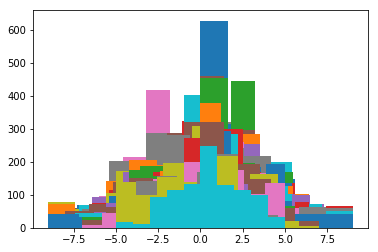

In [9]:
#compute Diff probability matrix for each emotion
diffMatDict=dict()
top3=dict()
for indexE,iEmo in enumerate(EMO_CAT):
    #retrieve top3
    #Test: display the frequency of top 3 color for 'fear' category, in Descending order
    top3_temp=intensityDict[iEmo]['sum'].sort_values(by=['frequency'],ascending=False)[0:3]
    #need to reset Panda index for only top3 entry
    top3[iEmo]=top3_temp.reset_index(drop=True)
    #Compute diffMat and store in dictionary
    diffMatDict[iEmo]=computeDiffMatrix(top3[iEmo],1000)
    print('Finish computation for emotion category:',iEmo,'\t\t',indexE+1,'/',len(EMO_CAT))
    

In [12]:
for index,iEmo in enumerate(EMO_CAT):
    print(iEmo,top3[iEmo])
    print(diffMatDict[iEmo])
    print('Percentage of top Color over total number of raters on the emotion',top3[iEmo].frequency[0]/intensityDict[iEmo]['sum'].frequency.sum())
    print('\n')
    #print(diffMatDict[iEmo]>0.7)

anger   colorFixed  frequency
0        red      512.0
1      black      347.0
2       gray       56.0
[[ 0.21   0.612  0.77 ]
 [ 0.149  0.397  0.587]
 [ 0.078  0.292  0.439]]
Percentage of top Color over total number of raters on the emotion 0.479400749064


calm   colorFixed frequency
0  lightblue       200
1      lilac       140
2    seablue       133
[[ 0.353  0.504  0.621]
 [ 0.302  0.405  0.491]
 [ 0.218  0.361  0.431]]
Percentage of top Color over total number of raters on the emotion 0.1568627450980392


contempt   colorFixed  frequency
0      black      119.0
1      lilac       97.0
2        red       69.0
[[ 0.415  0.419  0.349]
 [ 0.397  0.399  0.341]
 [ 0.453  0.493  0.323]]
Percentage of top Color over total number of raters on the emotion 0.120689655172


envy    colorFixed  frequency
0        jade      179.0
1  kellygreen      178.0
2   neongreen      112.0
[[ 0.376  0.398  0.229]
 [ 0.42   0.418  0.24 ]
 [ 0.452  0.501  0.278]]
Percentage of top Color over total number o